# PS6 - Perceptron

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Requirements
Using the lessons on Perceptrons using Scikit-learn, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

## 1. How many classes of Iris flowers are there in the dataset?

In [3]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [4]:
df['target'] = df['target'].astype('int32')

In [5]:
target_value = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}
df1 = df.copy()
df1['target'] = list(map(lambda x: target_value.get(x) if x in target_value else x, df1.target))
df1.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
90,5.5,2.6,4.4,1.2,versicolor
33,5.5,4.2,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
78,6.0,2.9,4.5,1.5,versicolor
92,5.8,2.6,4.0,1.2,versicolor


In [6]:
df2 = df1.melt(value_vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], 
               var_name='feature',
               id_vars='target', 
               value_name='mean')

In [7]:
df2.head()

,target,feature,mean
0,setosa,sepal length (cm),5.1
1,setosa,sepal length (cm),4.9
2,setosa,sepal length (cm),4.7
3,setosa,sepal length (cm),4.6
4,setosa,sepal length (cm),5.0


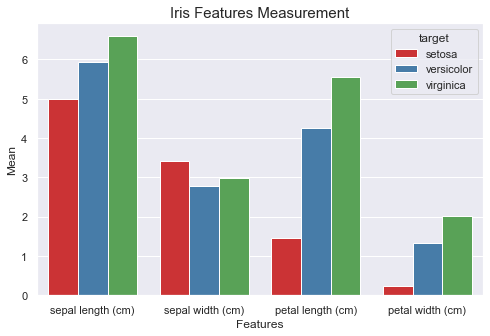

In [8]:
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data=df2, x='feature', y='mean', hue='target',palette='Set1', ci=None)
plt.title('Iris Features Measurement', fontdict={'fontsize': 15})
plt.xlabel('Features')
plt.ylabel('Mean')
plt.show()

The dataset contains three classes or species of the iris flower: **setosa**, **versicolor**, and **virginica**.

The bar graph above compares the flower parts mean measurements (sepal length, sepal width, petal length and petal width) of the three iris species. Virginica is the biggest, followed by versicolor and lastly, setosa -- the smallest.

## 2. What are the variances per feature of the dataset?

### Variance in features

The table below shows the variance in measurements in all the features. `Petal length` has the highest variance while `sepal width` has the lowest. The graph below shows a visualization of this.

In [9]:
df1.agg(['var'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
var,0.685694,0.189979,3.116278,0.581006


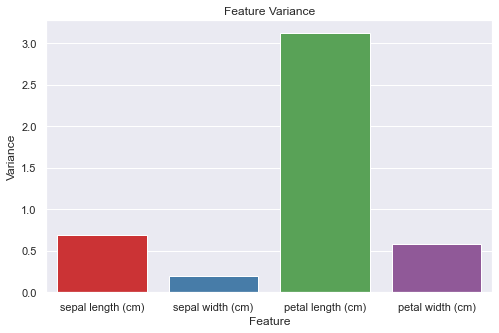

In [10]:
variance = df1.agg(['var']).T.reset_index()
sns.barplot(data=variance, x='index', y='var', palette='Set1')

plt.title('Feature Variance')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()

### Variance in features per species

Zooming in on the variance in features per species, it can be seen that `virginica` has the highest variance in all the features except `sepal width`.

In [11]:
df1.groupby('target').agg(['var'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
,var,var,var,var
target,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


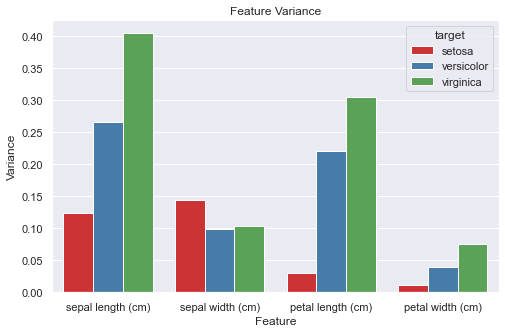

In [12]:
variance2 = df1.groupby('target').agg(['var']).reset_index()
variance2.columns = variance2.columns.droplevel(1)
variance2 = variance2.melt(value_vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], 
                   var_name='feature', 
                   id_vars='target', 
                   value_name='mean')

sns.barplot(data=variance2, x='feature', y='mean', hue='target', palette='Set1')

plt.title('Feature Variance')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()

## 3. Build a classifier for the Iris dataset.

#### This is the dataset that we will be working on:

In [13]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
137,6.4,3.1,5.5,1.8,2
117,7.7,3.8,6.7,2.2,2
96,5.7,2.9,4.2,1.3,1
86,6.7,3.1,4.7,1.5,1


#### Separate the independent (X) and the dependent (y) variables and then further divide it into the test/train subsets.

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Train the model.

Create an instance of the Perceptron algorithm and then fit it into the train dataset.

In [15]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix
classifier = Perceptron(random_state=0)
classifier.fit(X_train,y_train)

Perceptron()

#### Test the model and evaluate.

In [16]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

The model was able to perfectly classify the test data set. Precision, recall and f1 scores for all classes of the dependent variable are at 100%. This perfect classification is shown in the dataframe below comparing the true value vs predictions.

In [18]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

pred_df = pd.DataFrame(data=[y_test, y_pred]).T
pred_df.columns = ['y_test','y_pred']
pred_df

,y_test,y_pred
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1
